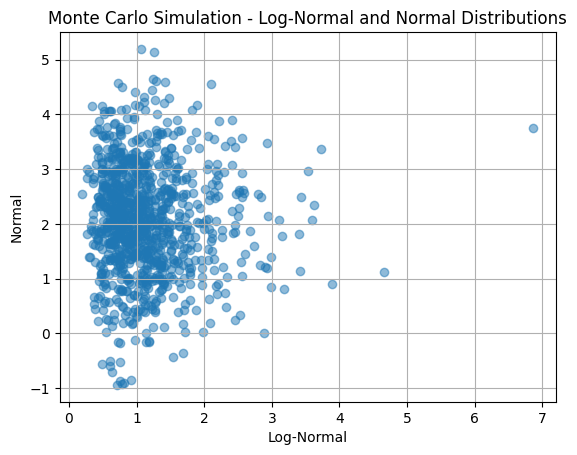

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate samples from a log-normal distribution
lognormal_mean = 0  # Mean of the underlying normal distribution
lognormal_sigma = 0.5  # Standard deviation of the underlying normal distribution
lognormal_samples = np.random.lognormal(lognormal_mean, lognormal_sigma, size=(num_samples, 1))

# Generate samples from a normal distribution
normal_mean = 2
normal_sigma = 1
normal_samples = np.random.normal(normal_mean, normal_sigma, size=(num_samples, 1))

# Combine the samples to create a bivariate dataset
bivariate_dataset = np.hstack((lognormal_samples, normal_samples))

# Plot the bivariate dataset
plt.scatter(bivariate_dataset[:, 0], bivariate_dataset[:, 1], alpha=0.5)
plt.title('Monte Carlo Simulation - Log-Normal and Normal Distributions')
plt.xlabel('Log-Normal')
plt.ylabel('Normal')
plt.grid(True)
plt.show()


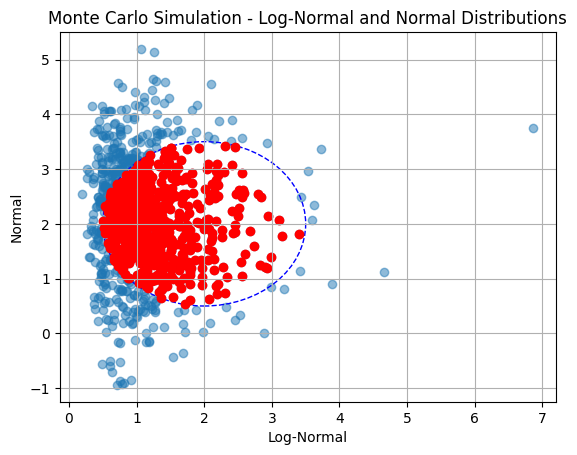

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate samples from a log-normal distribution
lognormal_mean = 0  # Mean of the underlying normal distribution
lognormal_sigma = 0.5  # Standard deviation of the underlying normal distribution
lognormal_samples = np.random.lognormal(lognormal_mean, lognormal_sigma, size=(num_samples, 1))

# Generate samples from a normal distribution
normal_mean = 2
normal_sigma = 1
normal_samples = np.random.normal(normal_mean, normal_sigma, size=(num_samples, 1))

# Combine the samples to create a bivariate dataset
bivariate_dataset = np.hstack((lognormal_samples, normal_samples))

# Define the center and radius of the circle
circle_center = (2, 2)
circle_radius = 1.5

# Check if each point is inside the circle
inside_circle = ((bivariate_dataset[:, 0] - circle_center[0])**2 + (bivariate_dataset[:, 1] - circle_center[1])**2) <= circle_radius**2

# Plot the bivariate dataset
plt.scatter(bivariate_dataset[:, 0], bivariate_dataset[:, 1], alpha=0.5)

# Plot the circle
circle = plt.Circle(circle_center, circle_radius, color='blue', fill=False, linestyle='dashed')
plt.gca().add_patch(circle)

# Highlight points inside the circle in red
plt.scatter(bivariate_dataset[inside_circle, 0], bivariate_dataset[inside_circle, 1], color='red')

plt.title('Monte Carlo Simulation - Log-Normal and Normal Distributions')
plt.xlabel('Log-Normal')
plt.ylabel('Normal')
plt.grid(True)
plt.show()



C:\Users\sieme\AppData\Local\Temp\ipykernel_5584\2368404625.py:41: RuntimeWarning: invalid value encountered in log
  return x1*np.log(x2) - x2*np.log(x1)


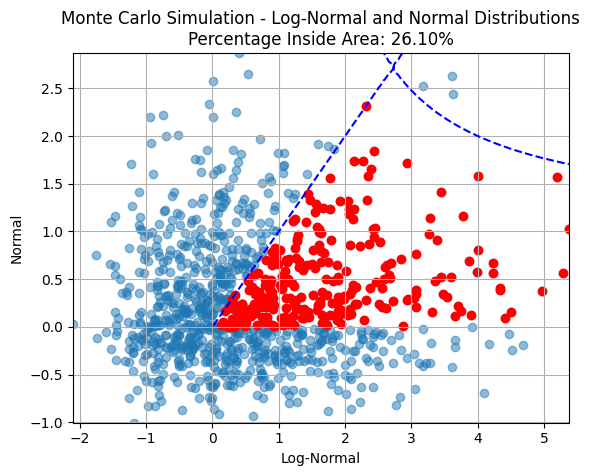

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# # Generate samples from a log-normal distribution
# lognormal_mean = 0
# lognormal_sigma = 0.5
# lognormal_samples = np.random.lognormal(lognormal_mean, lognormal_sigma, size=(num_samples, 1))

# Generate samples from a Gumbel distribution
gumbel_mean = 0
gumbel_sigma = 1
gumbel_samples_1 = np.random.gumbel(gumbel_mean, gumbel_sigma, size=(num_samples, 1))

gumbel_mean = 0
gumbel_sigma = 0.5
gumbel_samples_2 = np.random.gumbel(gumbel_mean, gumbel_sigma, size=(num_samples, 1))

# # Generate samples from a normal distribution
# normal_mean = 2
# normal_sigma = 1
# normal_samples = np.random.normal(normal_mean, normal_sigma, size=(num_samples, 1))

# Combine the samples to create a bivariate dataset
bivariate_dataset = np.hstack((gumbel_samples_1,gumbel_samples_2))

# Define an arbitrary function representing the area of interest
# def area_of_interest(x1, x2):
#     # Example: Circular region
#     a, b, r = 2, 2, 1.5
#     return (x1 - a)**2 + (x2 - b)**2 - r**2

def area_of_interest(x1, x2):
    # Example: Circular region
    a, b, r = 2, 2, 1.5
    return x1*np.log(x2) - x2*np.log(x1)
# Check if each point is inside the area of interest
inside_area = area_of_interest(bivariate_dataset[:, 0], bivariate_dataset[:, 1]) <= 0

# Calculate the percentage of samples within the area of interest
percentage_inside_area = (np.sum(inside_area) / num_samples) * 100

# Plot the bivariate dataset
plt.scatter(bivariate_dataset[:, 0], bivariate_dataset[:, 1], alpha=0.5)

# Plot the area of interest
x1_range = np.linspace(min(bivariate_dataset[:, 0]), max(bivariate_dataset[:, 0]), 100)
x2_range = np.linspace(min(bivariate_dataset[:, 1]), max(bivariate_dataset[:, 1]), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
plt.contour(X1, X2, area_of_interest(X1, X2), levels=[0], colors='blue', linestyles='dashed')

# Highlight points inside the area of interest in red
plt.scatter(bivariate_dataset[inside_area, 0], bivariate_dataset[inside_area, 1], color='red')

# Include the percentage in the title
plt.title(f'Monte Carlo Simulation - Log-Normal and Normal Distributions\nPercentage Inside Area: {percentage_inside_area:.2f}%')

plt.xlabel('Log-Normal')
plt.ylabel('Normal')
plt.grid(True)
plt.show()


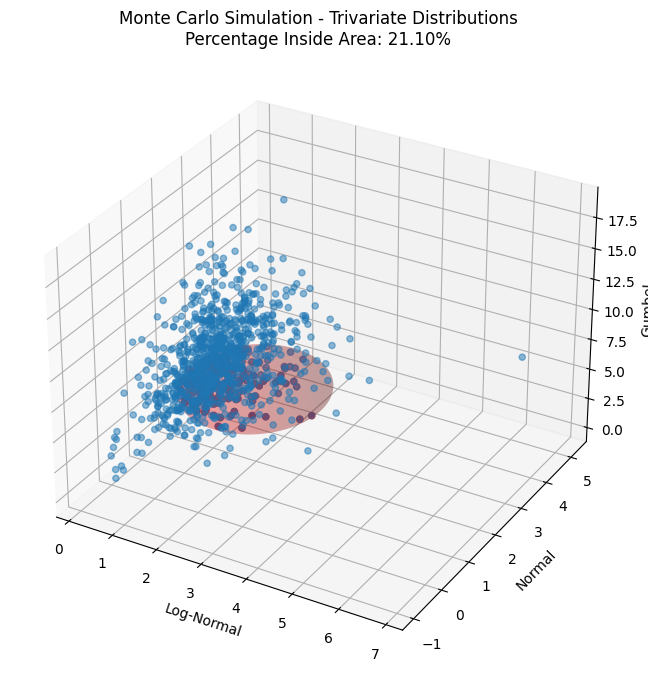

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, gumbel_r

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate samples from a log-normal distribution
lognormal_mean = 0
lognormal_sigma = 0.5
lognormal_samples = np.random.lognormal(lognormal_mean, lognormal_sigma, size=(num_samples, 1))

# Generate samples from a normal distribution
normal_mean = 2
normal_sigma = 1
normal_samples = np.random.normal(normal_mean, normal_sigma, size=(num_samples, 1))

# Generate samples from a Gumbel distribution
gumbel_loc = 5
gumbel_scale = 2
gumbel_samples = gumbel_r.rvs(loc=gumbel_loc, scale=gumbel_scale, size=(num_samples, 1))

# Combine the samples to create a trivariate dataset
trivariate_dataset = np.hstack((lognormal_samples, normal_samples, gumbel_samples))

# Define an arbitrary function representing the area of interest (sphere)
def area_of_interest(x1, x2, x3):
    # Example: Spherical region
    a, b, c, r = 2, 2, 5, 1.5
    return (x1 - a)**2 + (x2 - b)**2 + (x3 - c)**2 - r**2

# Check if each point is inside the area of interest
inside_area = area_of_interest(trivariate_dataset[:, 0], trivariate_dataset[:, 1], trivariate_dataset[:, 2]) <= 0

# Calculate the percentage of samples within the area of interest
percentage_inside_area = (np.sum(inside_area) / num_samples) * 100

# Plot the trivariate dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trivariate_dataset[:, 0], trivariate_dataset[:, 1], trivariate_dataset[:, 2], alpha=0.5)

# Plot the area of interest (sphere)
a, b, c, r = 2, 2, 5, 1.5
theta, phi = np.mgrid[0.0:2.0*np.pi:100j, 0.0:np.pi:50j]
x_sphere = a + r * np.sin(phi) * np.cos(theta)
y_sphere = b + r * np.sin(phi) * np.sin(theta)
z_sphere = c + r * np.cos(phi)
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.2)

# Highlight points inside the area of interest in red
ax.scatter(trivariate_dataset[inside_area, 0], trivariate_dataset[inside_area, 1], trivariate_dataset[inside_area, 2], color='red')

# Include the percentage in the title
plt.title(f'Monte Carlo Simulation - Trivariate Distributions\nPercentage Inside Area: {percentage_inside_area:.2f}%')

ax.set_xlabel('Log-Normal')
ax.set_ylabel('Normal')
ax.set_zlabel('Gumbel')
plt.show()


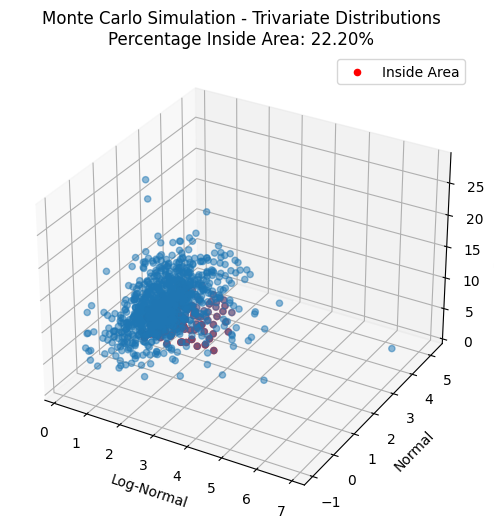

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate samples from a log-normal distribution
lognormal_mean = 0
lognormal_sigma = 0.5
lognormal_samples = np.random.lognormal(lognormal_mean, lognormal_sigma, size=(num_samples, 1))

# Generate samples from a normal distribution
normal_mean = 2
normal_sigma = 1
normal_samples = np.random.normal(normal_mean, normal_sigma, size=(num_samples, 1))

# Generate samples from a Gumbel distribution
gumbel_loc = 5
gumbel_scale = 2
gumbel_samples = np.random.gumbel(gumbel_loc, gumbel_scale, size=(num_samples, 1))

# Combine the samples to create a trivariate dataset
trivariate_dataset = np.hstack((lognormal_samples, normal_samples, gumbel_samples))

# Define an arbitrary function representing the area of interest (box)
def area_of_interest(x1, x2, x3):
    # Example: Box-shaped region
    x1_min, x1_max = 1, 3
    x2_min, x2_max = 1, 3
    x3_min, x3_max = 4, 8

    return (
        (x1 >= x1_min) & (x1 <= x1_max) &
        (x2 >= x2_min) & (x2 <= x2_max) &
        (x3 >= x3_min) & (x3 <= x3_max)
    )

# Check if each point is inside the area of interest
inside_area = area_of_interest(trivariate_dataset[:, 0], trivariate_dataset[:, 1], trivariate_dataset[:, 2])

# Calculate the percentage of samples within the area of interest
percentage_inside_area = (np.sum(inside_area) / num_samples) * 100

# Plot the trivariate dataset
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trivariate_dataset[:, 0], trivariate_dataset[:, 1], trivariate_dataset[:, 2], alpha=0.5)

# Highlight points inside the area of interest in red
ax.scatter(
    trivariate_dataset[inside_area, 0],
    trivariate_dataset[inside_area, 1],
    trivariate_dataset[inside_area, 2],
    color='red',
    label='Inside Area'
)

# Include the percentage in the title
plt.title(f'Monte Carlo Simulation - Trivariate Distributions\nPercentage Inside Area: {percentage_inside_area:.2f}%')

ax.set_xlabel('Log-Normal')
ax.set_ylabel('Normal')
ax.set_zlabel('Gumbel')
ax.legend()
plt.show()


## Sampling from a bivariate distributions with a copula 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pyvinecopulib as cop

class Bivariate:
    """Bivariate dependent distribution, design to function in the 
    same way as an instance of the scipy.stats.rv_continuous class,
    specifically, with methods: cdf, pdf, rvs.
    """
    
    def __init__(self, X1, X2, rho):
        """Constructor to initialize Bivariate object.
        
        Arguments:
        ---
        X1: scipy.stats.rv_continuous object. Marginal distribution
        X2: scipy.stats.rv_continuous object. Marginal distribution
        rho: float. Pearson correlation coefficient.
        """
        self.X1 = X1
        self.X2 = X2
        self.rho = rho
        self.copula_uv = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [rho])
        
    def cdf(self, x):
        """Compute cdf with array or list as argument: [x1, x2]."""
        x1 = x[0]
        x2 = x[1]
        u = self.X1.cdf(x1)
        v = self.X2.cdf(x2)
        return self.copula_uv.cdf(np.array([[u, v]]))[0]

    def pdf(self, x):
        """Compute pdf with array or list as argument: [x1, x2]."""
        x1 = x[0]
        x2 = x[1]
        u = self.X1.cdf(x1)
        v = self.X2.cdf(x2)
        return self.copula_uv.pdf(np.array([[u, v]]))[0]*self.X1.pdf(x1)*self.X2.pdf(x2)

    def rvs(self, size=1):
        """Create random sample with keyword argument size."""
        sample = self.copula_uv.simulate(size)
        sample_X1 = self.X1.ppf(sample[:,0])
        sample_X2 = self.X2.ppf(sample[:,1])
        return np.vstack([sample_X1.T, sample_X2.T]).T

    def plot_contour(bivar, xy_lim, data=None,
                        design_case=None, design_region=None,
                        nb_points=100):
        """Contour plot of PDF in the bivariate plane (X,Y).
        
        bivar: bivariate distribution, defined by
            scipy.stats.multivariate_normal.
        xy_lim: list. 1x4 list of xlim and ylim (in order) for plot limits.
            
        Optional arguments:
        
        data: array. A 2xN array of points.
        design_case: list. Typically a 1x2 list defining a key
            calculation point; plots as a red dot(s)
        design_region: array. A 2xN array of points that define the
            boundary of a region that will be shaded in gray between
            the boundary and the max y-axis value (ylim[1]).
        nb_points: int. Size of the grid (default: 200).

        returns: matplotlib.pyplot Figure and Axis objects. 
        """
        
        f, ax = plt.subplots(1)

        xlim = [xy_lim[0], xy_lim[1]]
        ylim = [xy_lim[2], xy_lim[3]]

        x = np.linspace(xlim[0], xlim[1], nb_points)
        y = np.linspace(ylim[0], ylim[1], nb_points)
        X,Y = np.meshgrid(x,y)
        pdf = np.zeros(X.shape)
        for i in range(X.shape[0]):
                for j in range(X.shape[1]):
                    # if X[i,j]>0 and Y[i,j]>0:
                    pdf[i,j] = bivar.pdf([X[i,j], Y[i,j]])
            
        ax.contour(X, Y, pdf, levels=8, cmap=cm.Blues)
        
        if isinstance(data, np.ndarray):
            ax.scatter(data[0,:], data[1,:], s=10.0,
                        facecolors='none', edgecolors='darkgray',
                        label='Data')
        
        if isinstance(design_region, np.ndarray):
            ax.plot(design_region[0,:], design_region[1,:],
                    label='Design Boundary', color='k')
            ax.fill_between(design_region[0,:], design_region[1,:],
                            ylim[1], label='Design Region', color='grey')
        
        if design_case:
            ax.plot(design_case[0], design_case[1], 'ro',
                    label='Design Case')
        
        ax.set_aspect("equal")
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_xlabel(r"$X_1$", fontsize=14)
        ax.set_ylabel(r"$X_2$", fontsize=14)
        if isinstance(design_region, np.ndarray) or design_case:
            ax.legend()
        return f, ax 
    

In [37]:
import scipy.stats as st
# Create distributions for 2 random variables, X1 and X2
X1 = st.norm(0,1)           # Normal distribution with mean 0 and standard deviation 1
X2 = st.gumbel_r(0,1)       # Gumbel distribution with location 0 and scale 1

# Define the copula parameter, in this case the Pearson correlation parameter
rho = -0.7

# Create the bivariate object
Bivariate_1 = Bivariate(X1 = X1, X2 = X2, rho = rho);

In [38]:
# Generate a random sample from this Bivariate distribution
number_of_samples = 10000
random_samples_biv_1 = Bivariate_1.rvs(size = number_of_samples)

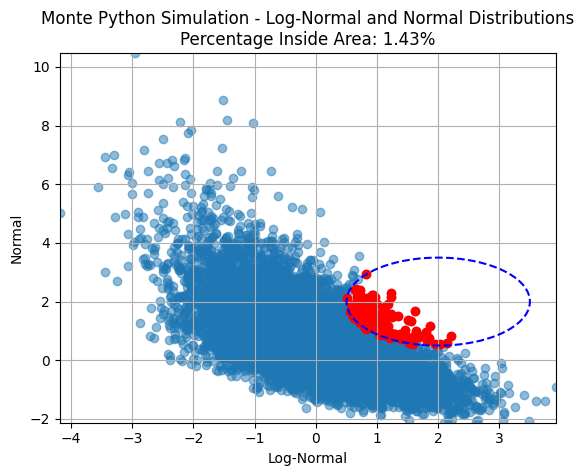

In [39]:
def area_of_interest(x1, x2):
    # Example: Circular region
    a, b, r = 2, 2, 1.5
    return (x1 - a)**2 + (x2 - b)**2 - r**2
# Check if each point is inside the area of interest
inside_area = area_of_interest(random_samples_biv_1[:, 0], random_samples_biv_1[:, 1]) <= 0

# Calculate the percentage of samples within the area of interest
percentage_inside_area = (np.sum(inside_area) / number_of_samples) * 100

# Plot the samples of the bivariate dataset
plt.scatter(random_samples_biv_1[:, 0], random_samples_biv_1[:, 1], alpha=0.5)

# Plot the area of interest
x1_range = np.linspace(min(random_samples_biv_1[:, 0]), max(random_samples_biv_1[:, 0]), 100)
x2_range = np.linspace(min(random_samples_biv_1[:, 1]), max(random_samples_biv_1[:, 1]), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
plt.contour(X1, X2, area_of_interest(X1, X2), levels=[0], colors='blue', linestyles='dashed')

# Highlight points inside the area of interest in red
plt.scatter(random_samples_biv_1[inside_area, 0], random_samples_biv_1[inside_area, 1], color='red')

# Include the percentage in the title
plt.title(f'Monte Python Simulation - Log-Normal and Normal Distributions\nPercentage Inside Area: {percentage_inside_area:.2f}%')

plt.xlabel('Log-Normal')
plt.ylabel('Normal')
plt.grid(True)
plt.show()